In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('EURUSD1440.csv')

In [3]:
df.head()

,Date,Time,Open,High,Low,Close,Volume
0,2012.12.10,0:00,1.29054,1.29454,1.28847,1.29358,122544
1,2012.12.11,0:00,1.29358,1.30137,1.29277,1.30104,129839
2,2013.05.13,0:00,1.29671,1.29991,1.29412,1.29740,91070
3,2013.05.14,0:00,1.29739,1.30284,1.29126,1.29193,107088
4,2013.05.15,0:00,1.29193,1.29420,1.28426,1.28856,107609


In [4]:
#Let's make a regression based on High variable
data = df['High']

In [5]:
train_index = round(len(df)*0.05)

In [6]:
train = data[:-train_index].values
test = data[-train_index:].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train.reshape(-1,1))
test = scaler.transform(test.reshape(-1,1))

In [8]:
batch_len = 5
batch_count = 1 

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
train_generated = TimeseriesGenerator(train, train, length=batch_len, 
                                      batch_size=batch_count)
test_generated = TimeseriesGenerator(test, test, length=5, batch_size=1 )

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [10]:


rnn = Sequential()
rnn.add(SimpleRNN(100, activation = 'relu', 
                  input_shape=(batch_len,batch_count)))
rnn.add(Dense(1))

In [11]:
rnn.compile(optimizer='adam', loss='mse')

In [12]:
rnn.fit(train_generated, epochs=10, validation_data=test_generated, 
        callbacks =[EarlyStopping(patience=4)])

Epoch 1/10
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0020 - val_loss: 4.4591e-04
Epoch 2/10
1753/1753 [==============================] - 4s 2ms/step - loss: 4.3744e-04 - val_loss: 5.4061e-04
Epoch 3/10
1753/1753 [==============================] - 4s 2ms/step - loss: 4.3526e-04 - val_loss: 3.7561e-04
Epoch 4/10
1753/1753 [==============================] - 4s 2ms/step - loss: 3.6714e-04 - val_loss: 5.7444e-04
Epoch 5/10
1753/1753 [==============================] - 4s 2ms/step - loss: 3.6133e-04 - val_loss: 3.4311e-04
Epoch 6/10
1753/1753 [==============================] - 4s 2ms/step - loss: 3.3182e-04 - val_loss: 2.8385e-04
Epoch 7/10
1753/1753 [==============================] - 4s 2ms/step - loss: 3.2455e-04 - val_loss: 2.7372e-04
Epoch 8/10
1753/1753 [==============================] - 4s 2ms/step - loss: 3.2043e-04 - val_loss: 5.7125e-04
Epoch 9/10
1753/1753 [==============================] - 4s 2ms/step - loss: 3.1549e-04 - val_loss: 2.9361e-04
Epoch 10/10
17

In [13]:
losses = pd.DataFrame(rnn.history.history)

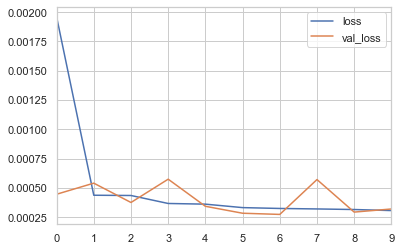

In [14]:
losses.plot()

In [15]:
predictions = rnn.predict(test_generated)

In [16]:
len(predictions)

88

In [17]:
len(test)

93

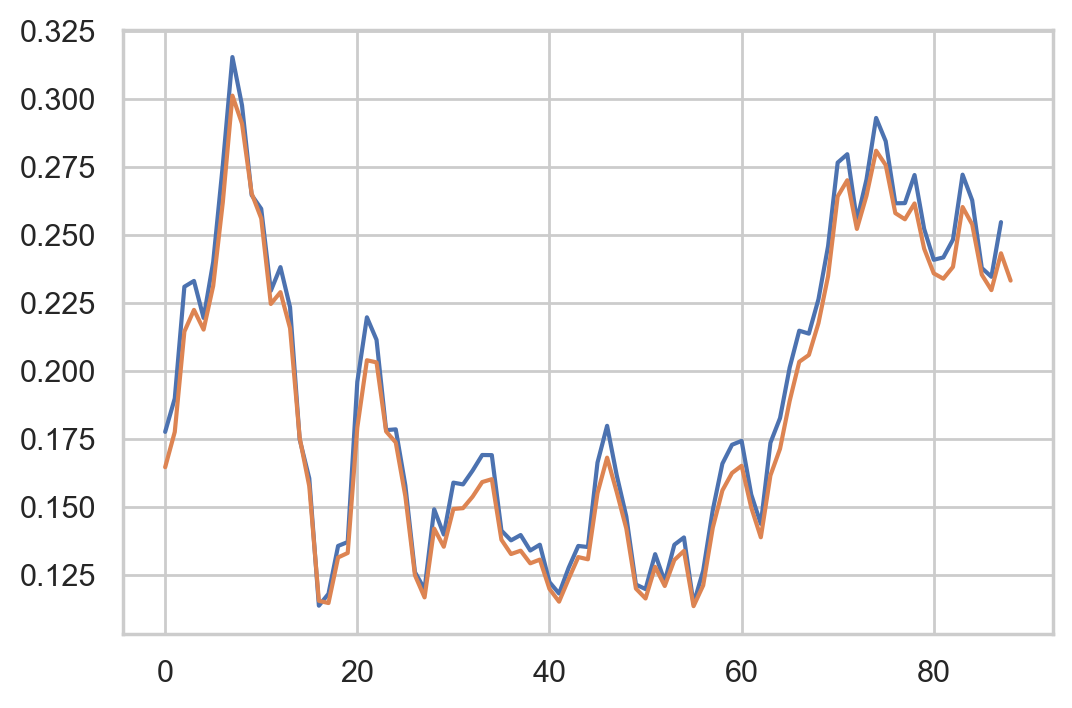

In [44]:
plt.figure(dpi=200)
plt.plot(predictions)
plt.plot(test[4:])

In [72]:
rnn_predictions = scaler.inverse_transform(predictions)
test_descaled = scaler.inverse_transform(test[5:])

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
mean_absolute_error(test_descaled,scaler.inverse_transform(lstm_predictions))

0.005093049883408968

In [74]:
mean_squared_error(test_descaled, scaler.inverse_transform(lstm_predictions))**0.5

0.00641067847348563

In [23]:
df

,Date,Time,Open,High,Low,Close,Volume
0,2012.12.10,0:00,1.29054,1.29454,1.28847,1.29358,122544
1,2012.12.11,0:00,1.29358,1.30137,1.29277,1.30104,129839
2,2013.05.13,0:00,1.29671,1.29991,1.29412,1.29740,91070
3,2013.05.14,0:00,1.29739,1.30284,1.29126,1.29193,107088
4,2013.05.15,0:00,1.29193,1.29420,1.28426,1.28856,107609
...,...,...,...,...,...,...,...
1846,2020.06.24,0:00,1.13069,1.13254,1.12479,1.12501,204586
1847,2020.06.25,0:00,1.12502,1.12593,1.11900,1.12173,219007
1848,2020.06.26,0:00,1.12171,1.12390,1.11948,1.12164,149464
1849,2020.06.29,0:00,1.12186,1.12874,1.12165,1.12410,149760


In [24]:
lstm = Sequential()
lstm.add(LSTM(100, activation='relu', 
              input_shape=((batch_len,batch_count))))
lstm.add(Dense(1))

In [25]:
lstm.compile(optimizer='adam', loss='mse')

In [26]:
lstm.fit(train_generated, validation_data=test_generated, epochs=15,
        callbacks=[EarlyStopping(patience=3)])

Epoch 1/15
1753/1753 [==============================] - 6s 3ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 2/15
1753/1753 [==============================] - 6s 3ms/step - loss: 8.0440e-04 - val_loss: 8.2888e-04
Epoch 3/15
1753/1753 [==============================] - 6s 4ms/step - loss: 6.2418e-04 - val_loss: 6.0439e-04
Epoch 4/15
1753/1753 [==============================] - 7s 4ms/step - loss: 5.0890e-04 - val_loss: 5.5758e-04
Epoch 5/15
1753/1753 [==============================] - 6s 4ms/step - loss: 4.5031e-04 - val_loss: 4.0081e-04
Epoch 6/15
1753/1753 [==============================] - 6s 4ms/step - loss: 3.9425e-04 - val_loss: 3.5788e-04
Epoch 7/15
1753/1753 [==============================] - 8s 4ms/step - loss: 3.6394e-04 - val_loss: 4.2258e-04
Epoch 8/15
1753/1753 [==============================] - 7s 4ms/step - loss: 3.3003e-04 - val_loss: 3.2052e-04
Epoch 9/15
1753/1753 [==============================] - 7s 4ms/step - loss: 3.3259e-04 - val_loss: 3.2809e-04
Epoch 10/15
1753/1

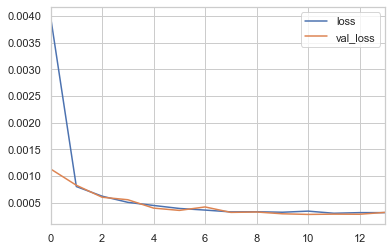

In [27]:
lstm_losses = pd.DataFrame(lstm.history.history)
lstm_losses.plot()

In [28]:
lstm_predictions = lstm.predict(test_generated)

In [54]:
len(test[4:])

89

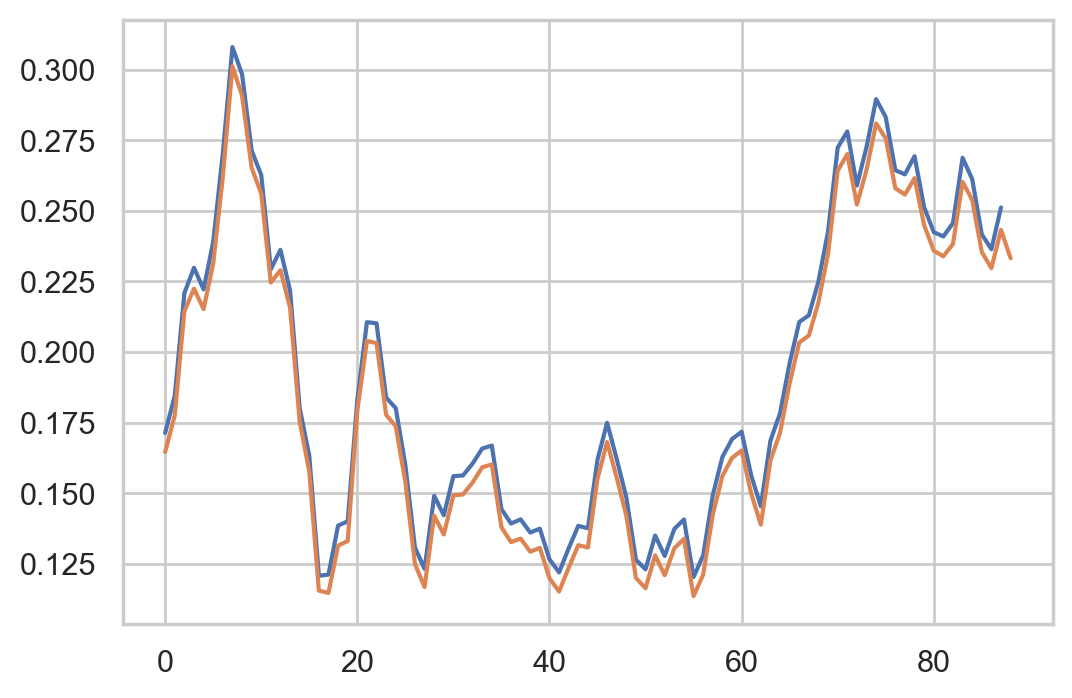

In [77]:
plt.figure(dpi=200)
plt.plot(lstm_predictions)
plt.plot(test[4:])

In [39]:
mean_absolute_error(test_descaled, scaler.inverse_transform(lstm_predictions))

0.005093049883408968

In [71]:
mean_squared_error(test_descaled, scaler.inverse_transform(lstm_predictions))**0.5

0.00641067847348563

In [63]:
len(scaler.inverse_transform(lstm_predictions))

88

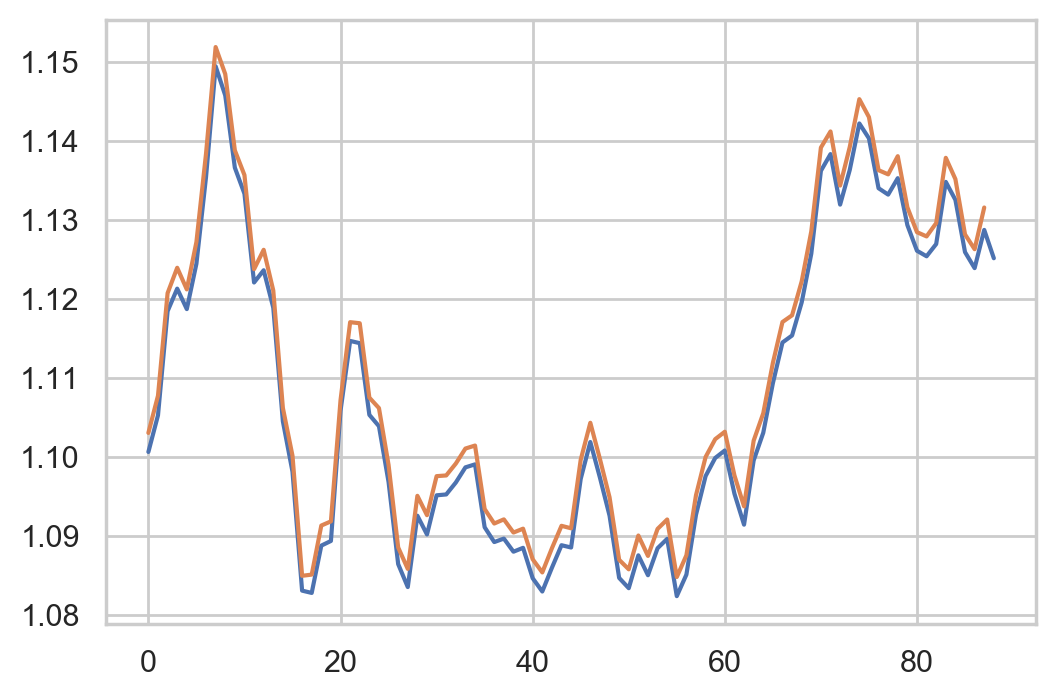

In [69]:
plt.figure(dpi=200)
plt.plot(test_descaled)
plt.plot(scaler.inverse_transform(lstm_predictions))

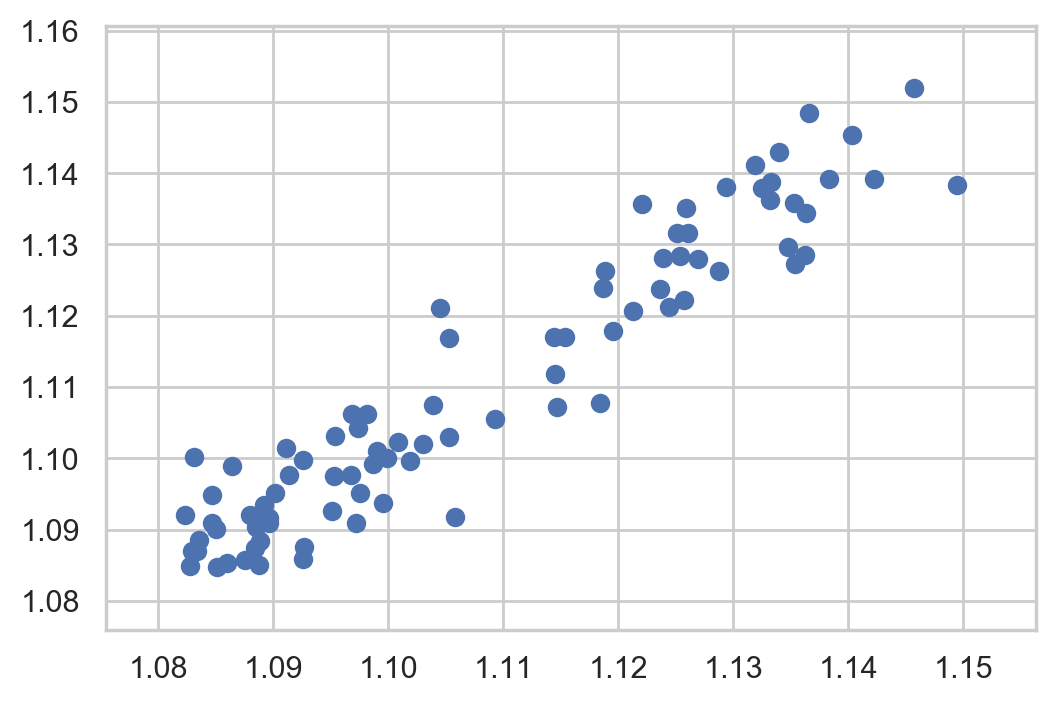

In [66]:
plt.figure(dpi=200)
plt.scatter(test_descaled[1:], scaler.inverse_transform(lstm_predictions))

In [ ]:
mean_squared_error(test_descaled, 
                   scaler.inverse_transform(lstm_predictions))**0.5